# Customized swath analyiss and essential data structure

## Customized swath area

PyOSP provides several geo-parameter based swath analyses, including elevation, slope, and topographic position index (TPI). However, in real applications, these options may not be sufficient for user to accurately delineate the desired topgraphic object. For example, the intended object possess roughness>0.5, or curvture<3, among other possibilities that not being covered by PyOSP. In order to deal with this issue, we provide a tip here that allows users to perform customized swath analysis. 

We use the same synthetic landscape that being used in section [Fixed-width curvilinear swath profile](./fix_width_curv.ipynb). 

Here, suppose PyOSP does not have elevation-based characterization. We take raster analysis in other software to exact the range of elevation>10, and incoporate the resulted DEM into swath profile analysis.

### Step 1. Raster calculation of elevation>10 in GIS software

<img alt="homo_circle" src="https://i.imgur.com/y1fvgik.png[/img]" height="250"/>

As shown above, we used raster calculation extract the portion of DEM having that elevation>10. 

### Step 2. Use fixed-width swath method to generate the swath object

Now, we use fixed-width swath method to generate the swath object bounded by new DEM. As illustrated previously, PyOSP keeps detecting the boundary of DEM to truncate the analysis at the data boundary. Thus, we can set swath width beyond the possible length of profile line, so the swath area will be determined by the DEM range rather than fixed-width.

**Note, PyOSP would assume no data area has cell value less then -1e+20. Make sure the raster file satisfy this criteria before the analysis.**


In [1]:
import pyosp

baseline = pyosp.datasets.get_path("homo_baseline.shp") # the path to baseline shapefile
raster = pyosp.datasets.get_path("homo_elev10.tif")  # the path to raster file

orig = pyosp.Orig_curv(baseline, raster, width=1000,
                       line_stepsize=3, cross_stepsize=None)

Processing: [#########################] 71 of 71 lineSteps

### Step 3. Swath results.

Now we can verify the results by swath profile plot, or exported polygon or polylines.

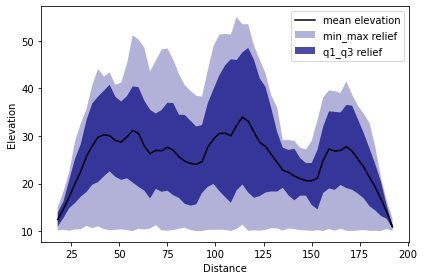

In [2]:
orig.profile_plot()

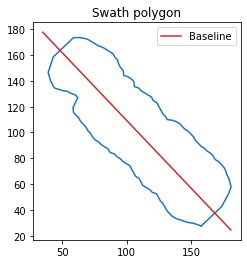

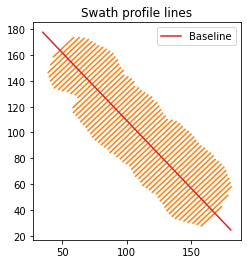

In [3]:
import matplotlib.pyplot as plt
from pyosp import read_shape

# read the baseline shape
line_shape = read_shape(baseline)
lx, ly = line_shape.xy

# Plot the swath polygon
fig, ax = plt.subplots()
swath_polygon = orig.out_polygon()
px, py = swath_polygon.exterior.xy
ax.plot(px, py)
ax.plot(lx, ly, color='C3', label="Baseline")
ax.set_aspect('equal', adjustable='box')
ax.set_title("Swath polygon")
ax.legend()

# Plot the swath profile lines
fig, ax = plt.subplots()
swath_polylines = orig.out_polylines()
for line in swath_polylines:
    x, y = line.xy
    ax.plot(x, y, color='C1')

ax.plot(lx, ly, color='C3', label="Baseline")
ax.set_aspect('equal', adjustable='box')
ax.set_title("Swath profile lines")
ax.legend()

Notice that all elevation data is above 10, and swath area is bounded by DEM data range. It demonstrates that PyOSP offers users the option to perform customized swath analysis (i.e., roughness, aspect, refief, structure, etc.). This flexibility provides the potential to incorporate any raster classification technique into the swath analysis beyond the default methods in PyOSP.

## PyOSP data structure

Now, let's take a look at structure of most essential data in PyOSP.

(1) Distance

Attibute *distance* presents an array of baseline points distances from the starting point. 

In [4]:
orig.distance

array([  0.,   3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,
        33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,
        66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,
        99., 102., 105., 108., 111., 114., 117., 120., 123., 126., 129.,
       132., 135., 138., 141., 144., 147., 150., 153., 156., 159., 162.,
       165., 168., 171., 174., 177., 180., 183., 186., 189., 192., 195.,
       198., 201., 204., 207., 210.])

(2) Lines

Lines restore coordinates of points along each profile line, from left hand side to the right. Let's examine a profile line with index of 9 (distance=27).

In [5]:
orig.lines[9]

[[147.66393878283108, 30.266284945875174],
 [148.2435671297984, 30.817674988759467],
 [148.8231954767657, 31.369065031643764],
 [149.402823823733, 31.920455074528054],
 [149.98245217070033, 32.47184511741235],
 [150.56208051766765, 33.02323516029664],
 [151.14170886463495, 33.574625203180936],
 [151.72133721160225, 34.12601524606523],
 [152.30096555856957, 34.67740528894952],
 [152.88059390553687, 35.228795331833815],
 [153.4602222525042, 35.78018537471811],
 [154.0398505994715, 36.3315754176024],
 [154.61947894643882, 36.882965460486695],
 [155.19910729340612, 37.43435550337099],
 [155.77873564037344, 37.98574554625528],
 [156.35836398734074, 38.537135589139574],
 [156.93799233430806, 39.088525632023874],
 [157.51762068127536, 39.63991567490817],
 [158.0972490282427, 40.19130571779246],
 [158.67687737520998, 40.74269576067675],
 [159.2565057221773, 41.294085803561046],
 [159.8361340691446, 41.84547584644534],
 [160.41576241611193, 42.39686588932963],
 [160.99539076307923, 42.948255932

(3) data

Attibute *data* provides raster values along each profile line. For example, values along same profile line as presented above. 

In [6]:
orig.dat[9]

[10.366577,
 10.775647,
 10.985182,
 11.849683,
 12.324719,
 12.434934,
 13.207694,
 14.339156,
 14.339156,
 15.918287,
 17.868557,
 18.705082,
 20.37459,
 22.935509,
 23.32269,
 25.494387,
 27.356518,
 28.160154,
 27.377426,
 28.819553,
 27.965193,
 26.129932,
 26.043837,
 26.854143,
 26.317019,
 26.637743,
 27.222136,
 26.62463,
 26.012062,
 24.822708,
 25.181057,
 23.875961,
 22.917784,
 23.280067,
 21.87542,
 20.613186,
 19.87687,
 19.87687,
 19.525146,
 19.106987,
 17.9117,
 18.822304,
 19.342886,
 18.516066,
 19.936953,
 20.327038,
 20.0634,
 18.608377,
 19.296824,
 17.993258,
 16.700563,
 15.849781,
 16.132235,
 14.963792,
 13.446796,
 13.099882,
 11.64522]

## Summary

We introduced herein using customized option to perform swath analysis beyond default methods in PyOSP. The afforded flexibility provides the potential to incorporate any raster classification technique into swath analysis. In addition, we walked through essential data attributes of PyOSP swath object, users should be able to further analysis, plot, or conduct other post-processings by making use of [numpy](https://numpy.org/), [Matplotlib](https://matplotlib.org/), [SciPy](https://www.scipy.org/), among other Python packages.   